# Keras and Tensorflow

NYC Resistor class, 2019-12-07

https://nycresistor.github.io/ml-keras-class/

wifi: NYCR24 password: clubmate

![](TF_FullColor_Horizontal.svg)

https://tensorflow.org

Google Brain's internal machine learning library. Open Sourced November 2015.

*Graph computation* paradigm (also Theano, CNTK, ...)

Python API

Tensorflow.js, TensorFlow Lite (Android/iOS), Tensor Processing Unit, R, C++, Haskell, Java, Go, Rust, ...

At the core:

1. Tensor handling library
2. Numerics abstraction layer
3. Deep Learning friendly interaction abstraction

![](keras-logo-2018-large-1200.png)

https://keras.io

High-level interface to tensor graph computation libraries: common abstraction for TensorFlow, Theano, CNTK, …

One code, many backends

Streamline neural network description

Embedded into Tensorflow, as of 2.0 the canonical interaction mode with Tensorflow.

# Tensorflow 2.0 interaction modes

As of Tensorflow 2.0, the recommended modes of interaction are (in order of increasing complexity and expressive power):

1. Keras with the `Sequential` model type.
2. Keras with the *Functional* model type. (this class)
3. Subclassing Keras objects.
4. Manually tracking and handling details. Using the `@tensorflow.function` decorator to instruct Tensorflow to optimize and manage computations, and using `GradientTape` to manage automatic differentiation.

# Installation

`pip install "tensorflow>=2.0.0"`

Will get you setup for CPU-only, vanilla TensorFlow, including the Tensorflow version of Keras

TensorFlow has very wide spectrum of possible optimization

GPU, Cluster, optimized execution ordering, vector processing instructions, ....

Compile yourself to get higher efficiency

Also make sure you have the PyLab stack

`pip install scipy numpy matplotlib`

Additional recommended Python tools to make this comfortable are iPython and Jupyter Lab

`pip install ipython jupyter`

# Tensorflow-Keras Hello World

Computer Vision Task: recognize handwritten digits (MNIST)

Populating the interactive namespace from numpy and matplotlib
(60000, 28, 28)


Text(0.5, 1.0, 'Digit: 5')

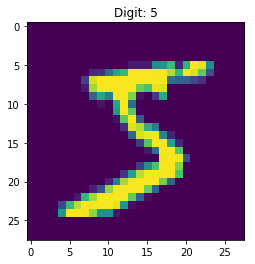

In [1]:
%pylab inline
import tensorflow as tf
from tensorflow import keras

((X_train, y_train), 
 (X_test, y_test)) = keras.datasets.mnist.load_data()

print(X_train.shape)
imshow(X_train[0,:,:])
title(f"Digit: {y_train[0]}")

![](KerasMNIST_1.png)

In [2]:
from tensorflow.keras.layers import Input, Dense, Reshape
from tensorflow.keras.models import Model

inputs = Input(shape=(28,28))
x = Reshape((28*28,))(inputs)
x = Dense(64, activation="relu")(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [3]:
model.fit(X_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 6s 98us/sample - loss: 1.5749 - accuracy: 0.8496s - loss: 4.8468 - accuracy: 0.75 - ETA: 7s - loss: 4.6863 - 


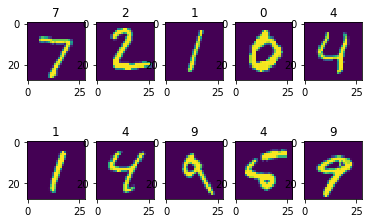

In [4]:
y_pred = model.predict(X_test[:10,:,:]).argmax(axis=1)

for i in range(10):
    subplot(2,5,i+1)
    imshow(X_test[i,:,:])
    title(y_pred[i])

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


# Neural Network Crash Course

Neural Networks go back and forth between two stages:

1. Linear model $x \to Wx + b$
2. Non-linear *activation function* $x \to f(x)$

Without the non-linear step successive linear models collapse to a single linear model.

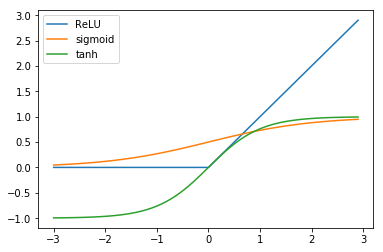

In [6]:
from tensorflow.keras.activations import *
xs = arange(-3,3,.1)
for f in [relu, sigmoid, tanh]:
    plot(xs, f(xs))
legend(["ReLU","sigmoid","tanh"])

# Neural Network Crash Course

Each pair of Linear → Non-linear is called a *layer*.

Layers compose to a *network*.

The first layer is the *input*, the last layer is the *output*, additional layers are *hidden layers*.

**Theorem** Neural networks can approximate (almost every) function.

# Computer Vision: Convolutional Neural Networks

Recognizing things in images should not depend on **where** in the image the thing is.

Solution: Convolutional Neural Network - sweep a *window* over the image, and let the same network operate on each window.

Usually paired with **pooling** - adjacent (hyper)pixels "vote" using addition, means or maximum on their content.

Other ways to improve performance of our digit recognition system are to enforce redundancy. **Dropout layers** will randomly remove parts of the signal forcing the network to be robust enough to survive losing parts of itself at random.

* N x 28 x 28
  - CNN ReLU layer, 32 outputs
* N x 26 x 26 x 32
  - CNN ReLU layer, 64 outputs
* N x 24 x 24 x 64
  - Max pooling layer 
* N x 12 x 12 x 64
  - 25% Dropout layer
* N x 12 x 12 x 64
  - Reshape layer
* N x 9216
  - Dense ReLU layer
* N x 128
  - Dense ReLU layer
* N x 128
  - 25% Dropout layer
* N x 128
  - Dense Softmax output layer
* N x 10


In [7]:
from tensorflow.keras.layers import *

inputs = Input(shape=(28,28))
x = Reshape((28,28,1))(inputs) # because we need "colors" for CNN
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(64, 3, activation="relu")(x)
x = MaxPool2D(2)(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.25)(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
model.fit(X_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.2998 - accuracy: 0.9440


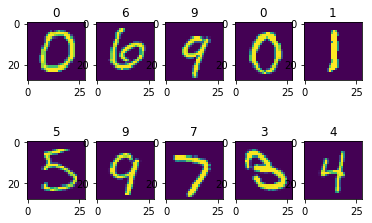

In [9]:
y_pred = model.predict(X_test[10:20,:,:].astype("float")).argmax(axis=1)

for i in range(10):
    subplot(2,5,i+1)
    imshow(X_test[10+i,:,:])
    title(y_pred[i])

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0   

# Tensorboard

One major attractive tool is **Tensorboard** - a dashboard for training ML models in Tensorflow. You install it with pip: `pip install tensorboard`.

To use it, create and add a **callback** to your `model.fit` call.
Instead of 

```
model.fit(X_train, y_train)
```

use

```
tb = keras.callbacks.TensorBoard()
model.fit(X_train, y_train, callbacks=[tb])
```

This writes out logs to the directory `./logs/` that you can view by running the command

```
tensorboard --logdir logs
```

# Now you

Keras includes a dataset with pictures of fashion items, the `fashion_mnist` dataset.

With what we've done so far, you are equipped to build a system to tell the difference between shoes and handbags, t-shirts and jackets. 